In [1]:
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
report_files = [
    "naive.json",
    "plm.json",
]

In [3]:
def load_report(file):
    with open(file, "r") as f:
        report = json.load(f)

    df = pd.DataFrame(report).transpose()
    return df

# Precision, recall and F1 score for each class

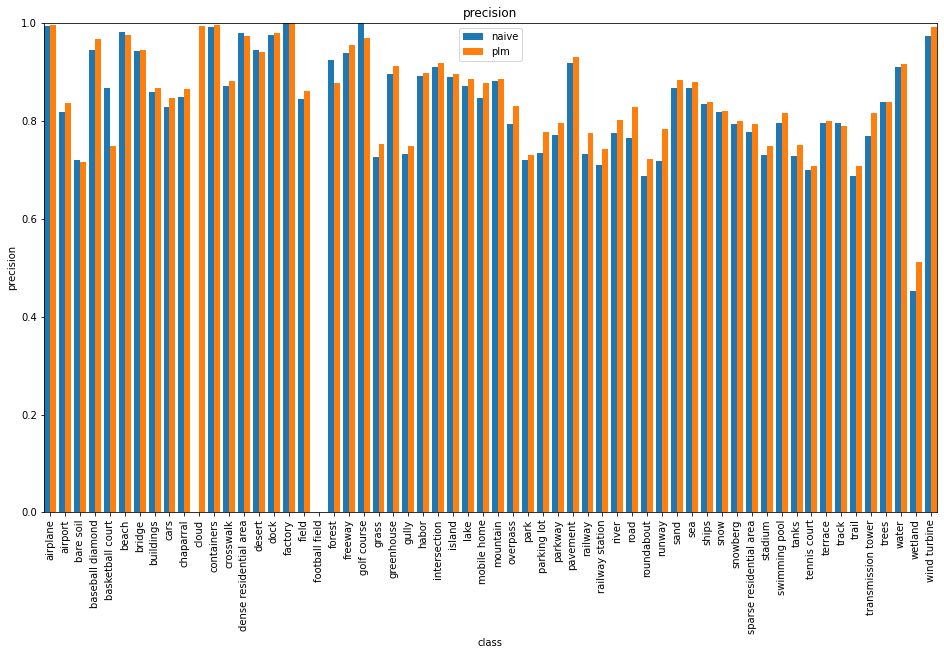

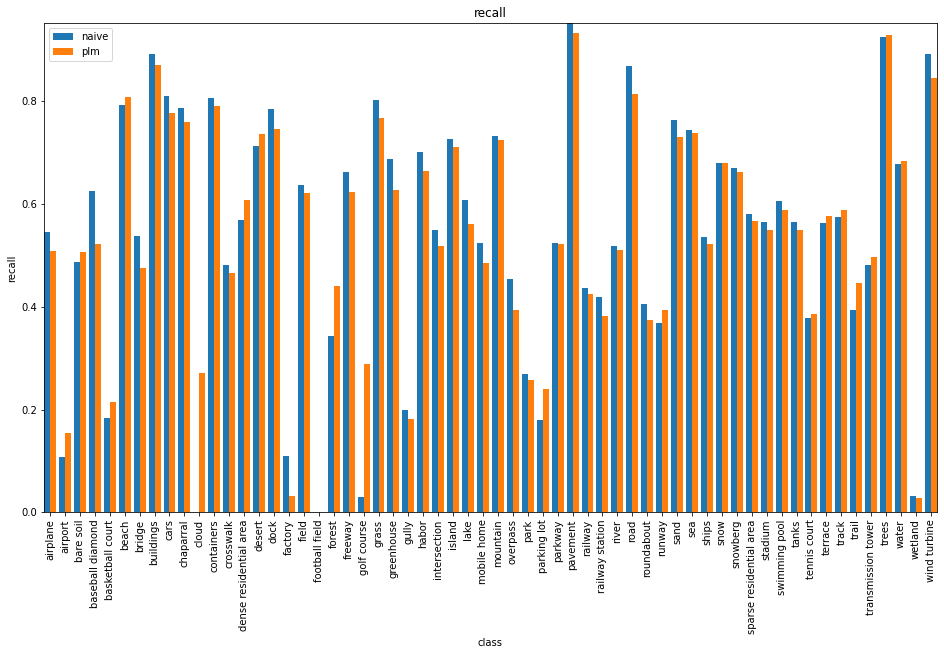

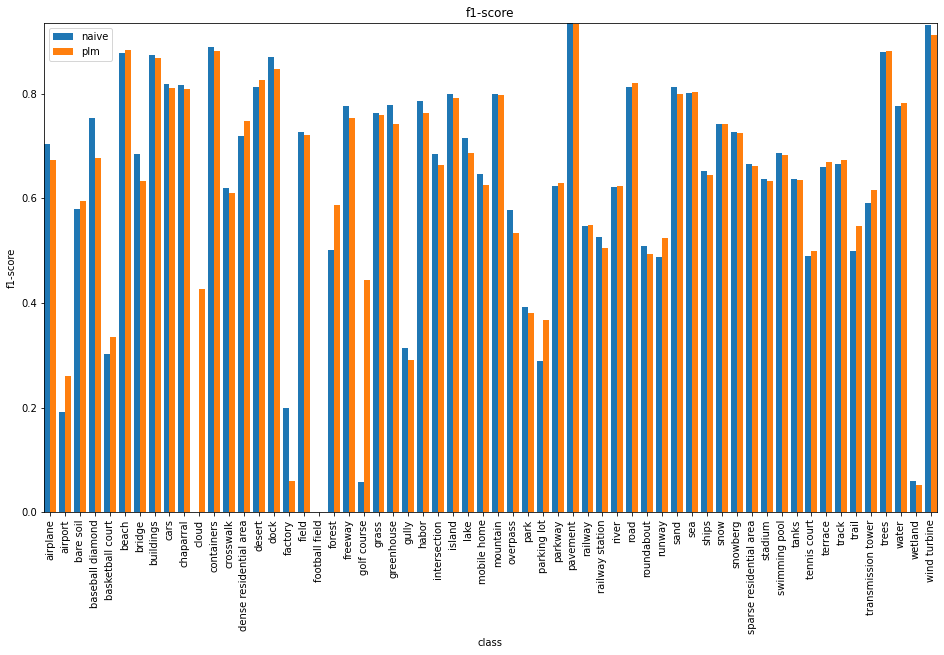

In [4]:
# Reference:
#   https://stackoverflow.com/a/48158449

metrics = ["precision", "recall", "f1-score"]
width = 0.8
n_files = len(report_files)

for metric in metrics:
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(1,1,1)

    for i, file in enumerate(report_files):
        df = load_report(file)
        name = Path(file).stem

        X = np.arange(len(df[metric][:-4]))
        ax.bar(X - width/2. + i/float(n_files)*width, df[metric][:-4], width=width/float(n_files), label=name, align="edge")
        ax.set_xlabel("class")
        ax.set_xticks(X, df.index[:-4])
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_ylabel(metric)
        ax.set_title(metric)
        ax.autoscale(tight=True)
        ax.grid(axis="y")
        ax.legend()

    plt.show()

# Classes whose F1 score is improved

In [5]:
df1 = load_report(report_files[0])
df2 = load_report(report_files[1])
df = df1.merge(df2, how="outer", left_index=True, right_index=True, suffixes=["_naive", "_plm"])

In [6]:
with pd.option_context("display.float_format", "{:.3f}".format):
    display(
        df[df["f1-score_naive"] < df["f1-score_plm"]] \
        [["precision_naive", "precision_plm", "recall_naive", "recall_plm", "f1-score_naive", "f1-score_plm", "support_naive"]]
    )

,precision_naive,precision_plm,recall_naive,recall_plm,f1-score_naive,f1-score_plm,support_naive
airport,0.819,0.836,0.109,0.155,0.192,0.261,1713.000
bare soil,0.720,0.717,0.486,0.507,0.580,0.594,27511.000
basketball court,0.868,0.750,0.184,0.215,0.303,0.335,2572.000
beach,0.982,0.976,0.793,0.808,0.878,0.884,1762.000
cloud,0.000,0.994,0.000,0.271,0.000,0.427,1315.000
dense residential area,0.979,0.974,0.568,0.608,0.719,0.749,1989.000
desert,0.945,0.941,0.712,0.735,0.812,0.826,1802.000
forest,0.925,0.877,0.343,0.441,0.501,0.587,2528.000
golf course,1.000,0.970,0.030,0.289,0.059,0.445,1816.000
parking lot,0.736,0.778,0.180,0.240,0.290,0.367,6029.000


* F1 score is improved among 24 classes. The same goes for overall performance, that is, micro/macro/weighted/samples average.
  * Especially, the naive model could not detect `cloud` at all, while the model with PLM could do that.
  * PLM imporves recall for the most classes. 